In [1]:
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/cmdb/miniconda3/envs/week8/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


### Part 1: Filtering

/Users/cmdb/miniconda3/envs/week8/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


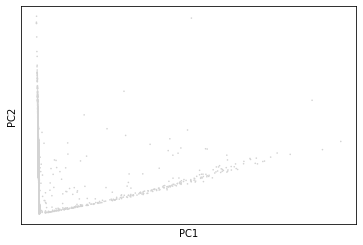

In [3]:
sc.tl.pca(adata)
sc.pl.pca(adata)

In [4]:
sc.pp.recipe_zheng17(adata)

/Users/cmdb/miniconda3/envs/week8/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/cmdb/miniconda3/envs/week8/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


/Users/cmdb/miniconda3/envs/week8/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


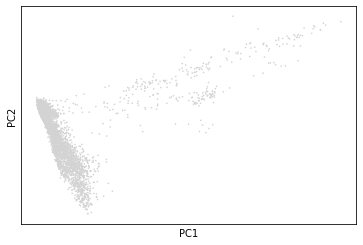

In [5]:
sc.tl.pca(adata)
sc.pl.pca(adata)

### Part 2: Clustering

In [6]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

In [7]:
sc.tl.tsne(adata)

/Users/cmdb/miniconda3/envs/week8/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


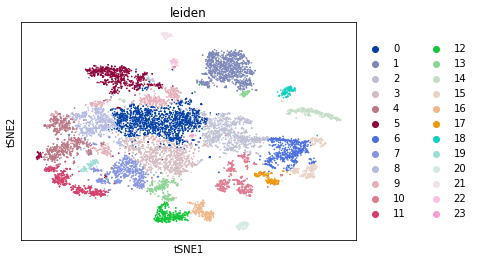

In [8]:
sc.pl.tsne(adata, color = 'leiden')

In [9]:
sc.tl.umap(adata)

/Users/cmdb/miniconda3/envs/week8/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


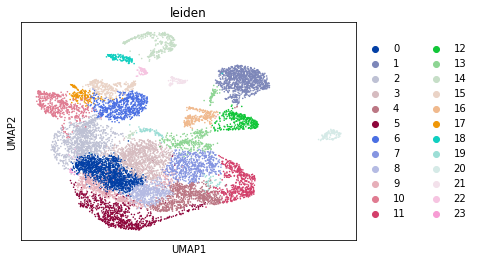

In [10]:
sc.pl.umap(adata, color = 'leiden')

### Part 3: Distinguishing Genes

/Users/cmdb/miniconda3/envs/week8/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


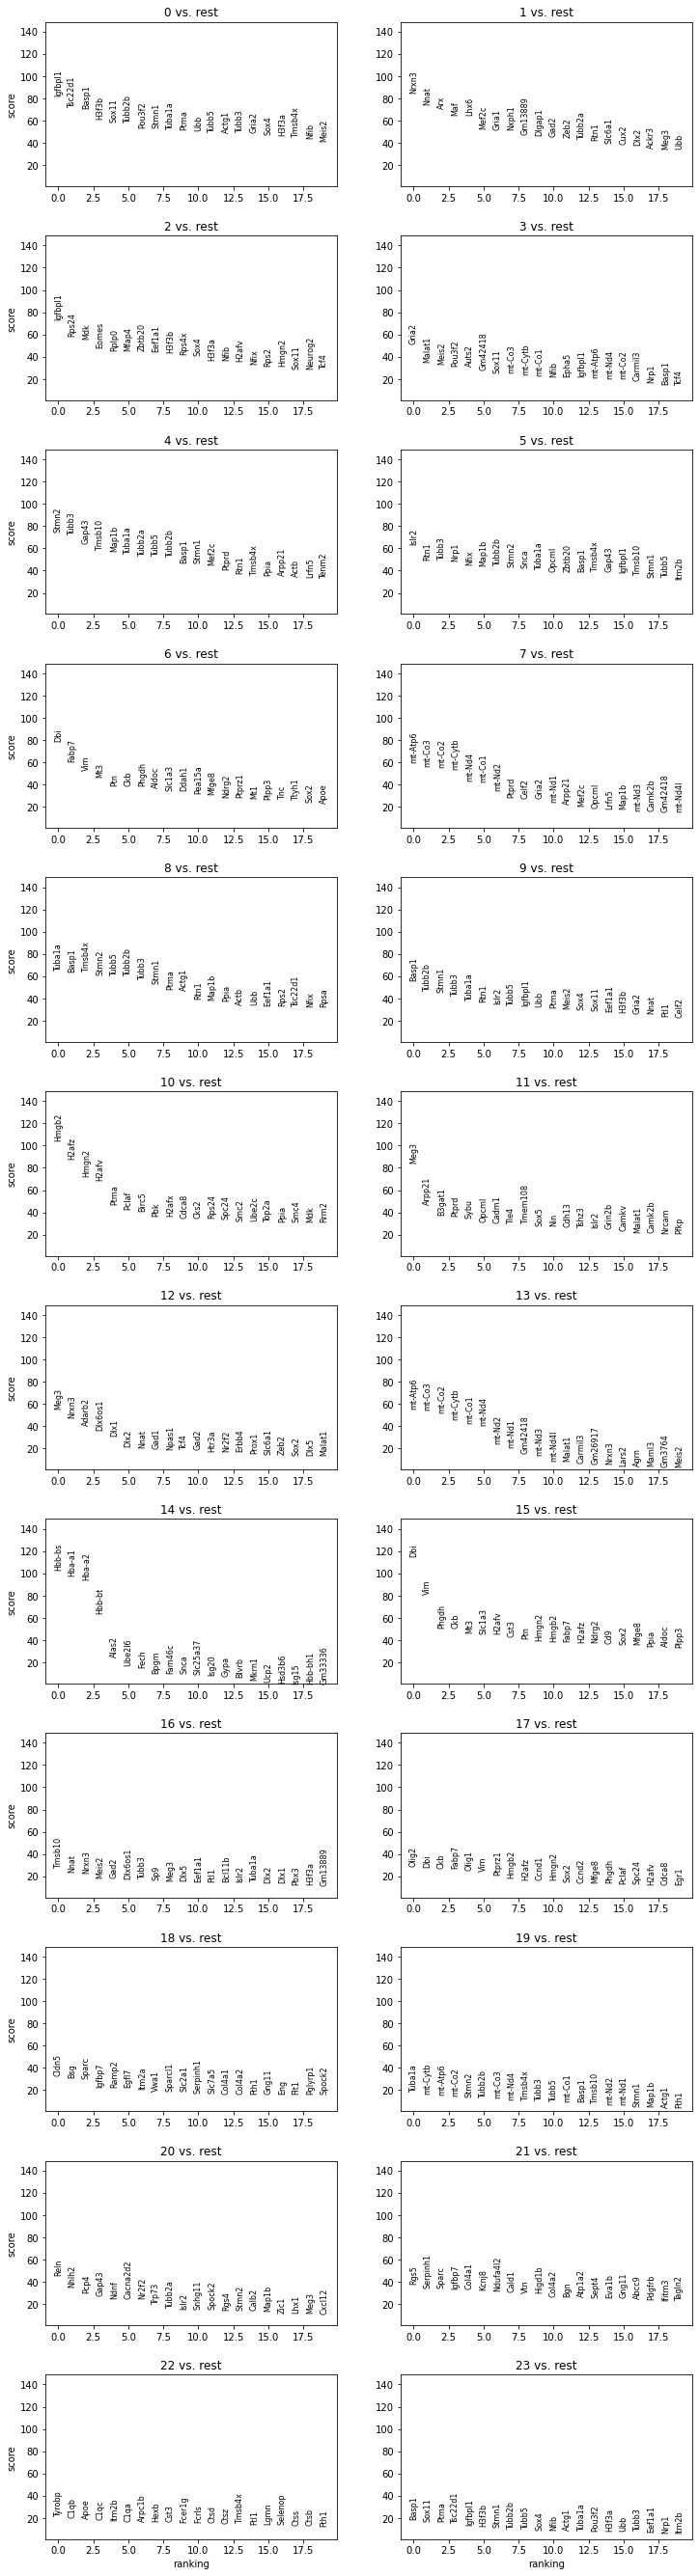

In [11]:
sc.tl.rank_genes_groups(adata,groupby = 'leiden')
sc.pl.rank_genes_groups(adata, ncols = 2)

/Users/cmdb/miniconda3/envs/week8/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


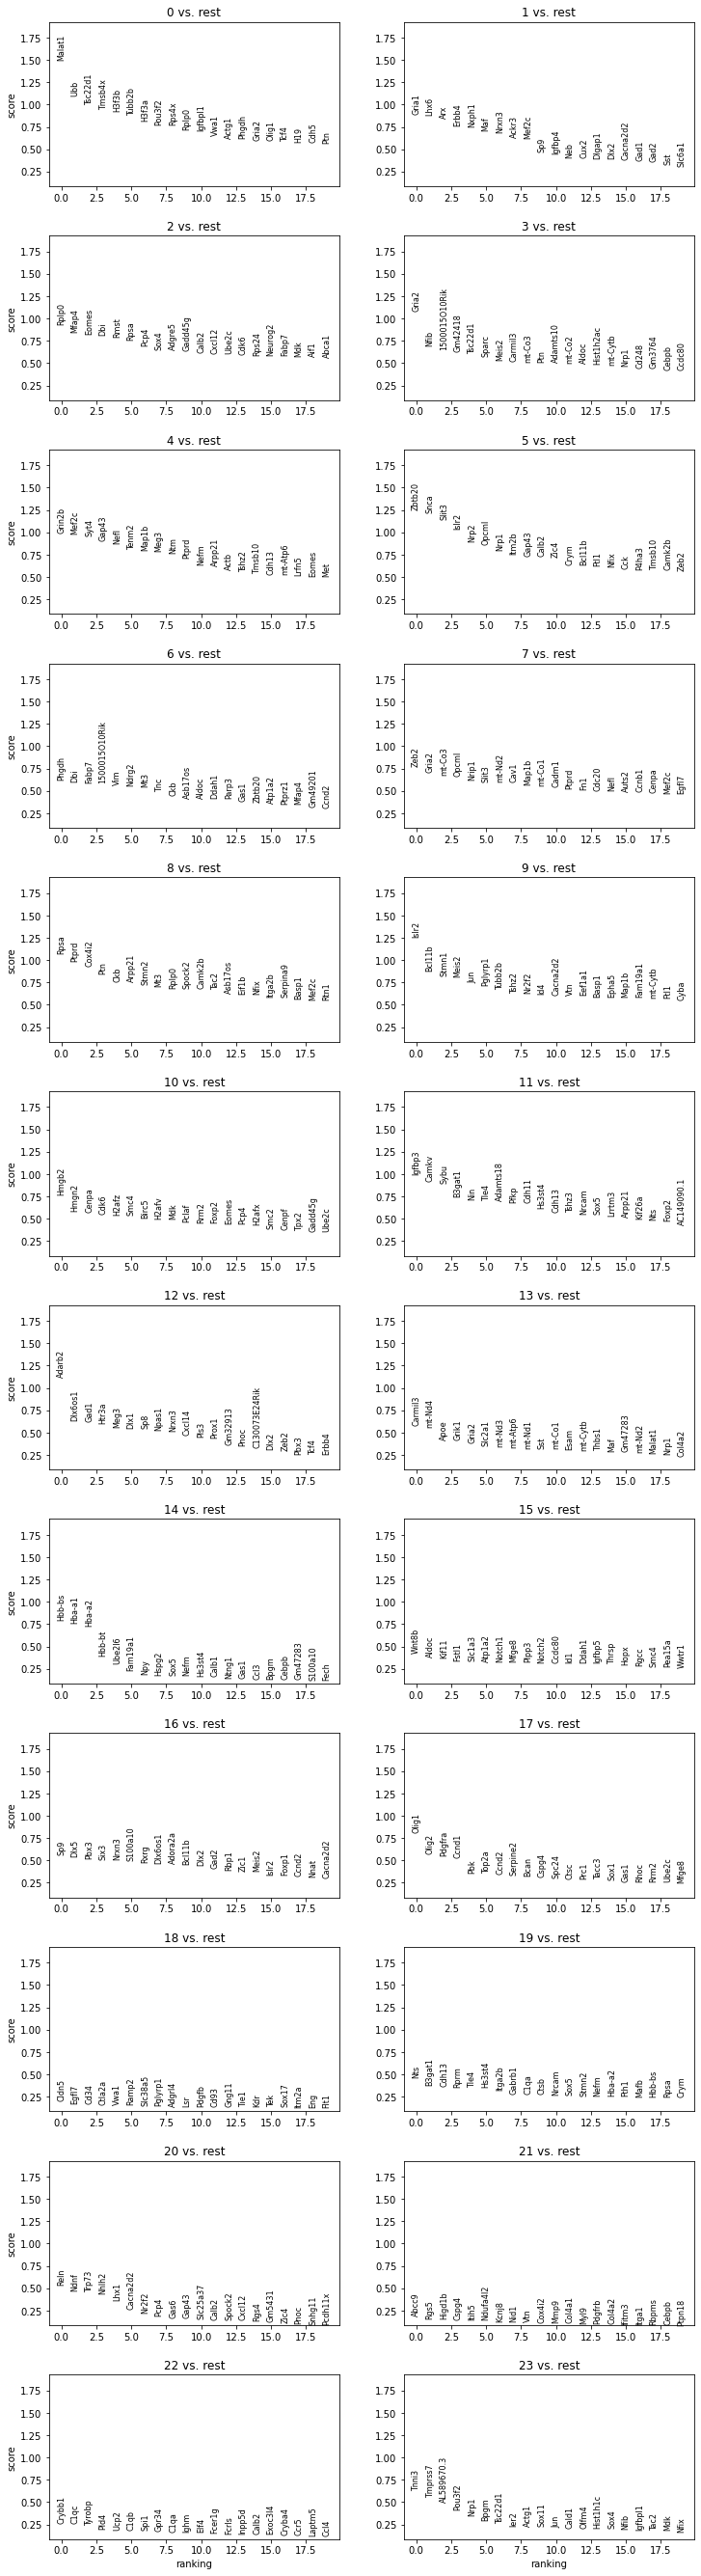

In [12]:
sc.tl.rank_genes_groups(adata,groupby = 'leiden', method = 'logreg')
sc.pl.rank_genes_groups(adata, ncols = 2)

### Part 4: Cell Types

/Users/cmdb/miniconda3/envs/week8/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


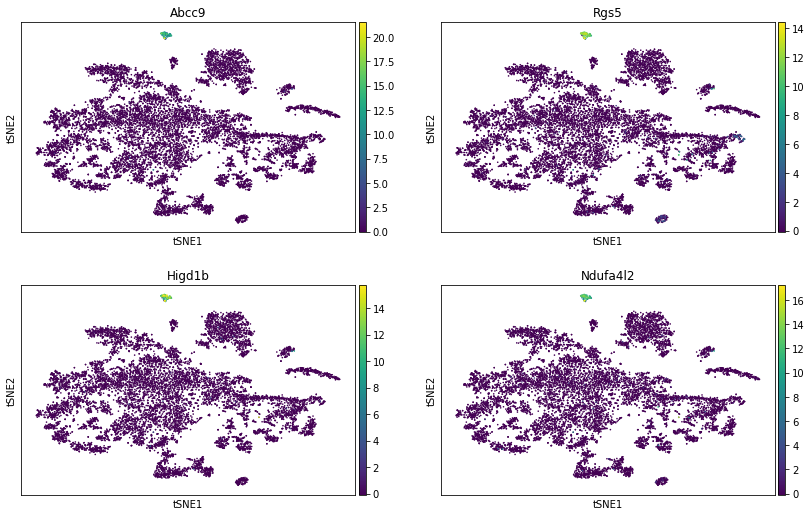

In [13]:
#pericytes and vascular related cells = 21 vs. rest
sc.pl.tsne(adata, color=['Abcc9', 'Rgs5', 'Higd1b','Ndufa4l2'], ncols=2)

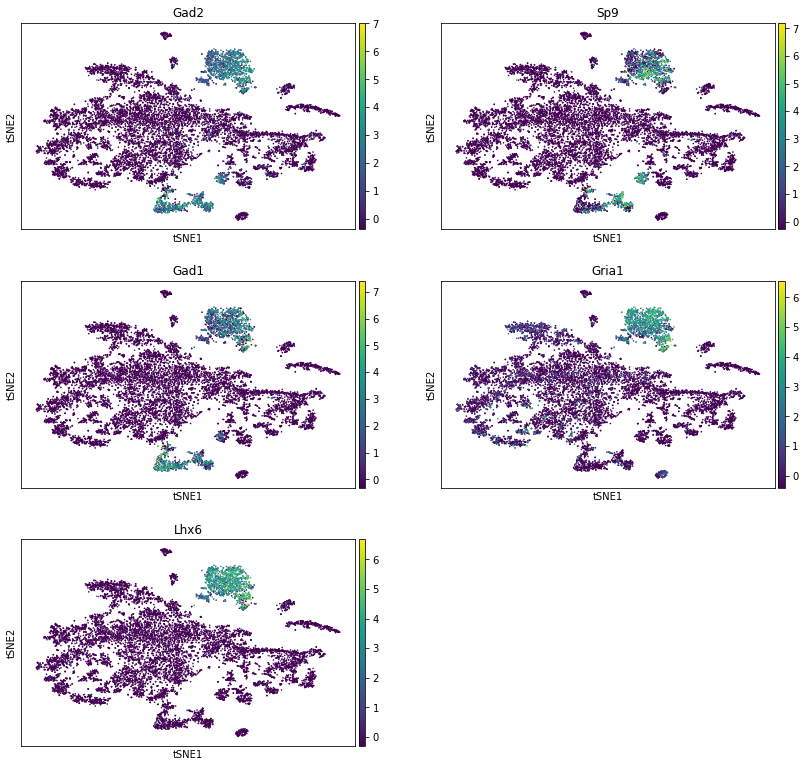

In [14]:
#gaba producing neurons (interneurons) = 1 vs. rest
sc.pl.tsne(adata, color=['Gad2', 'Sp9', 'Gad1', 'Gria1', 'Lhx6'], ncols = 2)

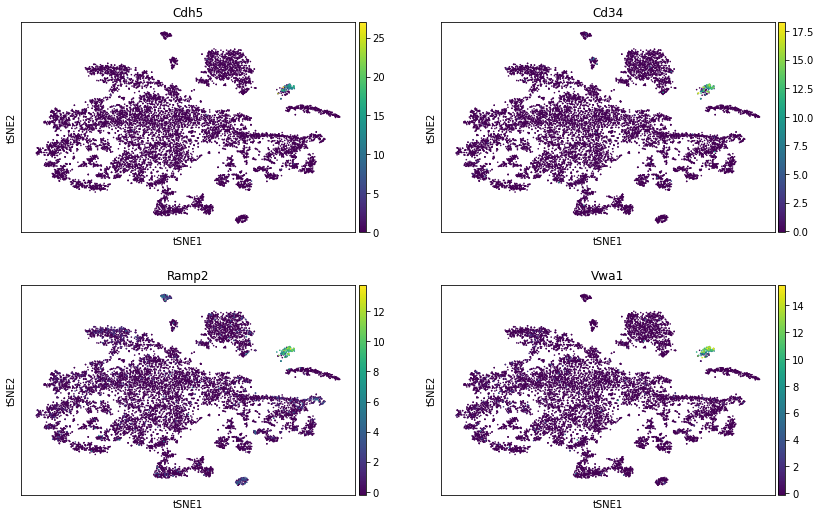

In [15]:
sc.pl.tsne(adata, color=['Cdh5', 'Cd34', 'Ramp2', 'Vwa1'], ncols = 2)
# The two non-neuronal clusters were identified
# as blood vessel-derived endothelial cells

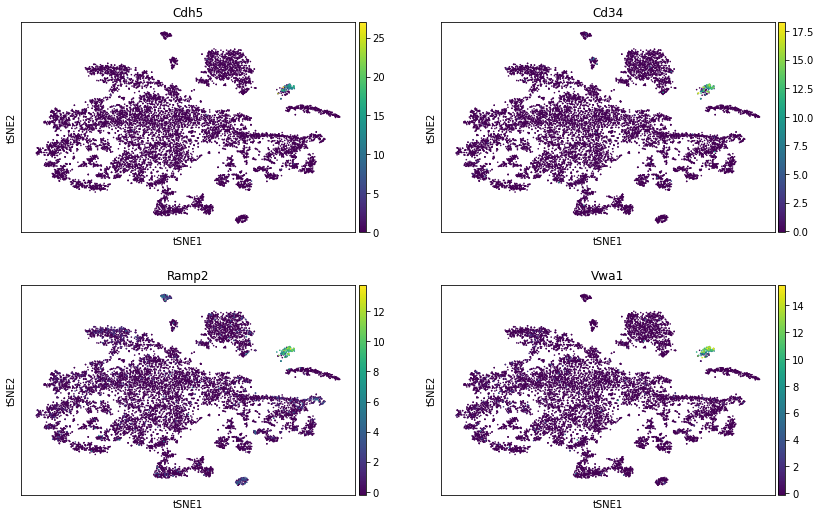

In [16]:
# vascular epethelial cells (BBB?) = 18 vs rest
sc.pl.tsne(adata, color=['Cdh5', 'Cd34', 'Ramp2', 'Vwa1'],ncols = 2)

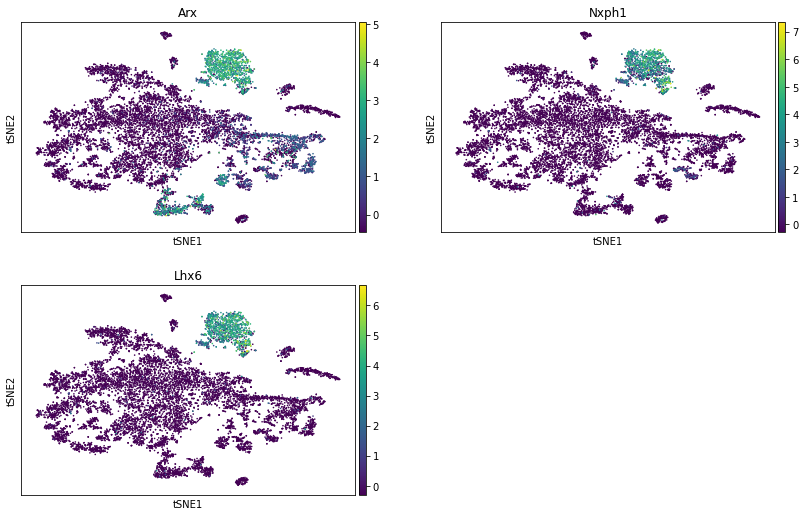

In [17]:
sc.pl.tsne(adata, color = ["Arx",
"Nxph1",
"Lhx6"],ncols = 2) #cluster 0, cholinergic

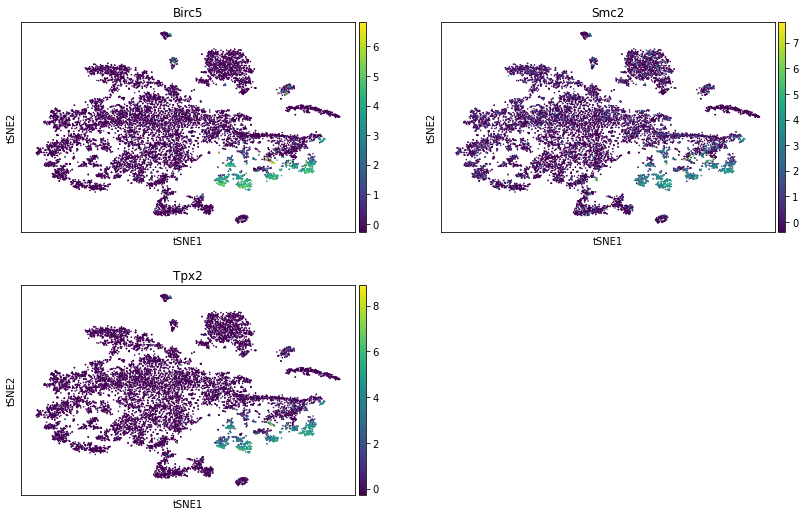

In [18]:
sc.pl.tsne(adata, color = ["Birc5",
"Smc2",
"Tpx2"],ncols = 2) #cluster 12, neural crest like glia

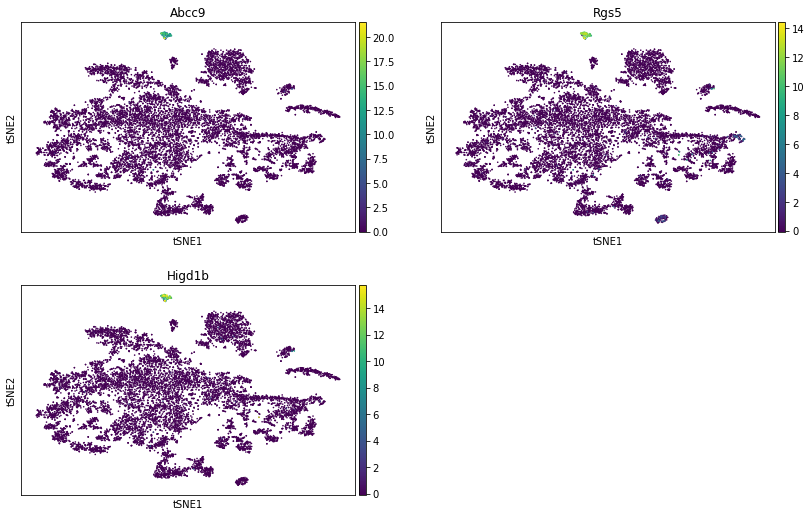

In [19]:
sc.pl.tsne(adata, color = ["Abcc9",
"Rgs5",
"Higd1b"], ncols = 2) #cluster 23, vascular smooth cells

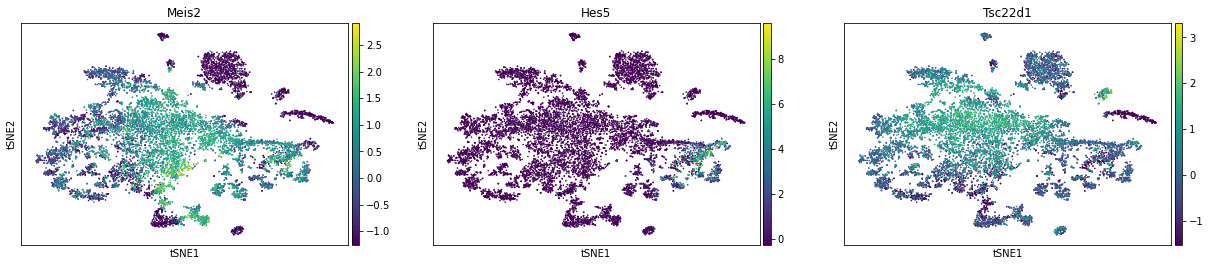

In [20]:
sc.pl.tsne(adata, color = ["Meis2",
"Hes5",
"Tsc22d1"]) #cluster 1, gabaergic

In [21]:
count = 0
for cluster in adata.uns['rank_genes_groups']['names']:
    print(cluster[11])
    count+=1
    if count == 10:
        break

Igfbp3
Camkv
Sybu
B3gat1
Nin
Tle4
Adamts18
Pfkp
Cdh11
Hs3st4


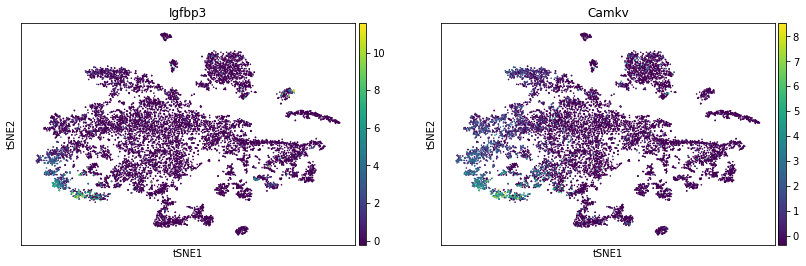

In [22]:
sc.pl.tsne(adata, color = ['Igfbp3', 'Camkv'], ncols = 2) #pyramidal neurons

In [23]:
# Labels for updated UMAP
for i in range(len(adata.obs['leiden'])):
    if adata.obs['leiden'][i] == '21':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'pericyte', inplace = True)
    elif adata.obs['leiden'][i] == '22':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'microglia', inplace = True)
    elif adata.obs['leiden'][i] == '1':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'GABAergic', inplace = True)
    elif adata.obs['leiden'][i] == '6':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'astrocytes1', inplace = True)
    elif adata.obs['leiden'][i] == '15':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'astrocytes2', inplace = True)    
    elif adata.obs['leiden'][i] == '12':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'neural crest-like glia', inplace = True)    
    elif adata.obs['leiden'][i] == '17':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'oligodendrocytes', inplace = True)    
    elif adata.obs['leiden'][i] == '23':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'vascular smooth cells', inplace = True)
    elif adata.obs['leiden'][i] == '11':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'pyramidal neurons', inplace = True)
    elif adata.obs['leiden'][i] == '18':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'vascular endothelial cells (BBB)', inplace = True)
        #Repeat for each cell type to be replaced

In [24]:
#b5bd61
#808080
adata.uns['leiden_colors'][21] = '#b5bd61'
adata.uns['leiden_colors'][23] = '#000000'
adata.uns['leiden_colors'][7] = '#FF4A46'
adata.uns['leiden_colors'][15] = "#0AA6D8"
adata.uns['leiden_colors'][0] = "#808080"
adata.uns['leiden_colors'][2] = "#808080"
adata.uns['leiden_colors'][3] = "#808080"
adata.uns['leiden_colors'][4] = "#808080"
adata.uns['leiden_colors'][5] = "#808080"
adata.uns['leiden_colors'][7] = "#808080"
adata.uns['leiden_colors'][8] = "#808080"
adata.uns['leiden_colors'][9] = "#808080"
adata.uns['leiden_colors'][10] = "#808080"
adata.uns['leiden_colors'][13] = "#808080"
adata.uns['leiden_colors'][14] = "#808080"
adata.uns['leiden_colors'][16] = "#808080"
adata.uns['leiden_colors'][19] = "#808080"
adata.uns['leiden_colors'][20] = "#808080"

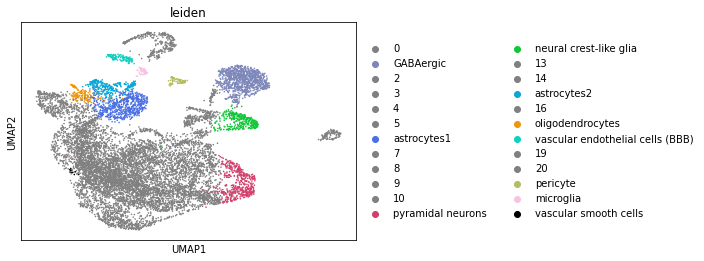

In [25]:
sc.pl.umap(adata, color = 'leiden')

In [26]:
'''21 = pericyte
0 = cholinergic
22 = microglia
1 = gabaergic
6 = astrocytes
15 = astrocytes 2
12 = neural crest-like glia
17 = oligodendrocytes, Olig1, Olig2
23 = vascular smooth cells
11 = pyramidal neurons, Camkv
18 = vascular endothelial cells (BBB?)'''

'21 = pericyte\n0 = cholinergic\n22 = microglia\n1 = gabaergic\n6 = astrocytes\n15 = astrocytes 2\n12 = neural crest-like glia\n17 = oligodendrocytes, Olig1, Olig2\n23 = vascular smooth cells\n11 = pyramidal neurons, Camkv\n18 = vascular endothelial cells (BBB?)'